In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tesla-latest-stock-data-29-jun10-to-14-oct21/Tesla_Latest_Stock_Data.csv


In [2]:
%%capture
!pip install chart-studio

In [3]:
# Importing libraries
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
from pylab import rcParams
from chart_studio import plotly as py
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error
print(os.listdir("../input"))

['tesla-latest-stock-data-29-jun10-to-14-oct21']


In [4]:
tesla = pd.read_csv('../input/tesla-latest-stock-data-29-jun10-to-14-oct21/Tesla_Latest_Stock_Data.csv', index_col='Date', parse_dates=['Date'])
tesla.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0


In [5]:
tesla.tail(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-10-01,778.400024,780.780029,763.590027,775.219971,17031400,0,0.0
2021-10-04,796.500000,806.969971,776.119995,781.530029,30483300,0,0.0
2021-10-05,784.799988,797.309998,774.200012,780.590027,18432600,0,0.0
2021-10-06,776.200012,786.659973,773.219971,782.750000,14632800,0,0.0
2021-10-07,785.460022,805.000000,783.380005,793.609985,19195800,0,0.0
2021-10-08,796.210022,796.380005,780.909973,785.489990,16711100,0,0.0
2021-10-11,787.650024,801.239990,785.500000,791.940002,14200300,0,0.0
2021-10-12,800.929993,812.320007,796.570007,805.719971,22020000,0,0.0
2021-10-13,810.469971,815.409973,805.780029,811.080017,14120100,0,0.0


In [6]:
tesla.isna().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

**So, there are no mising values.**

# Visualizing the datasets

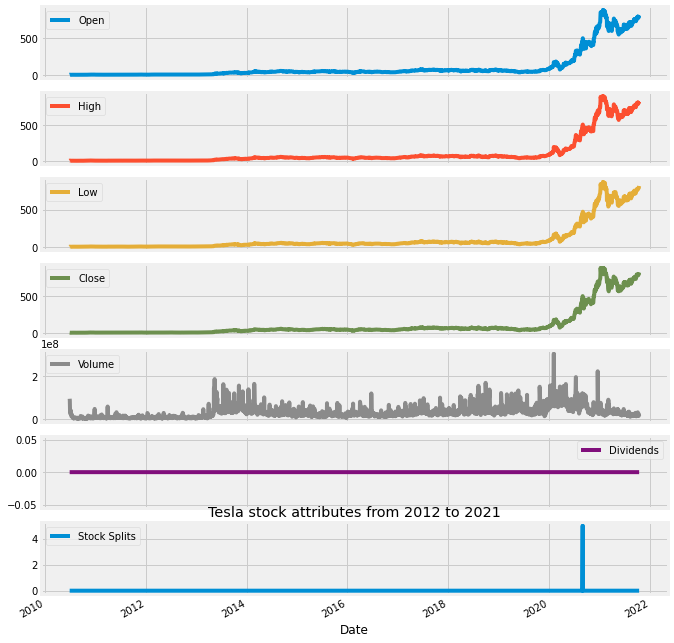

In [7]:
tesla['2010':'2021'].plot(subplots=True, figsize=(10,12))
plt.title('Tesla stock attributes from 2012 to 2021')
plt.savefig('stocks.png')
plt.show()

# Statistics

## Percent change

<AxesSubplot:xlabel='Date'>

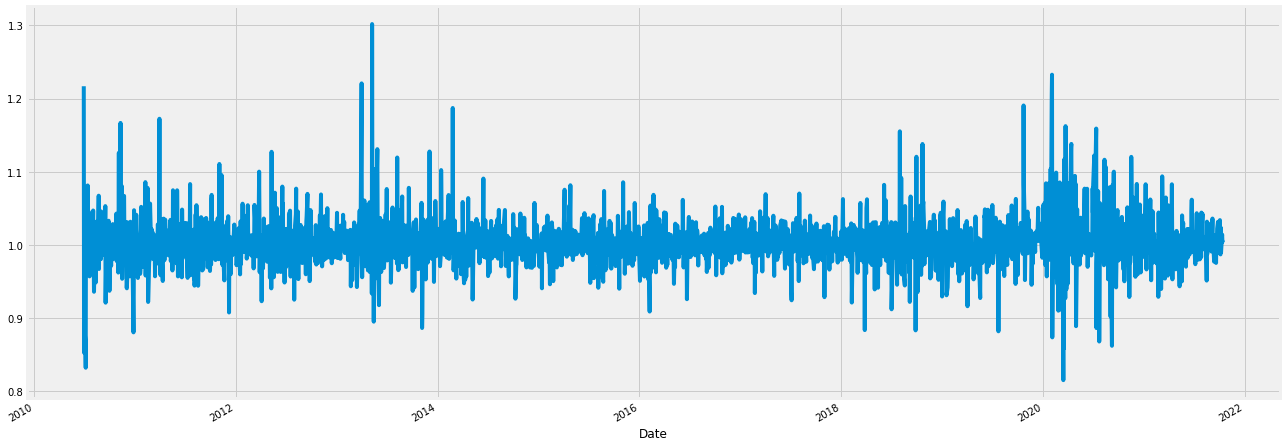

In [8]:
tesla['Change'] = tesla.High.div(tesla.High.shift())
tesla['Change'].plot(figsize=(20,8))

# Stock returns

<AxesSubplot:xlabel='Date'>

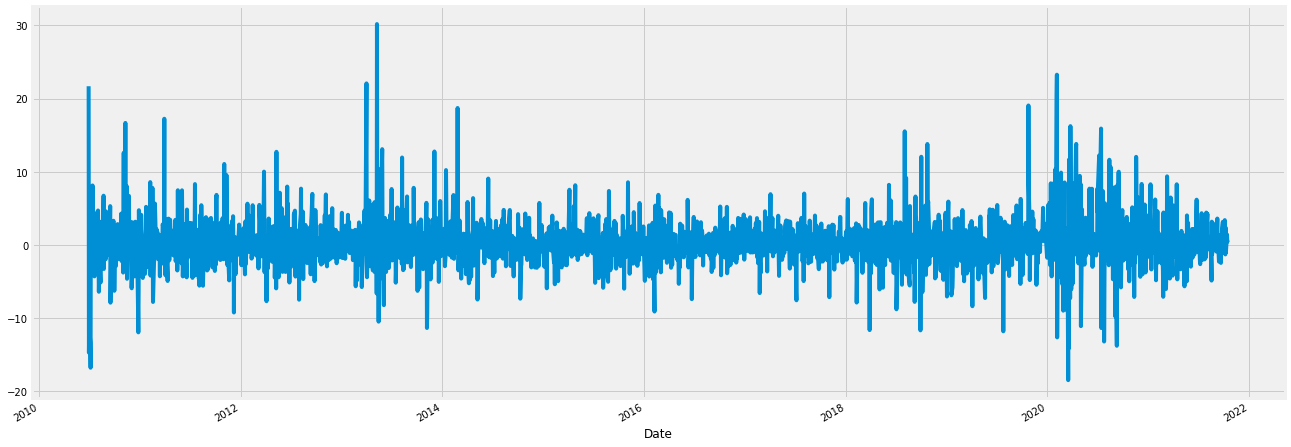

In [9]:
tesla['Return'] = tesla.Change.sub(1).mul(100)
tesla['Return'].plot(figsize=(20,8))

<AxesSubplot:xlabel='Date'>

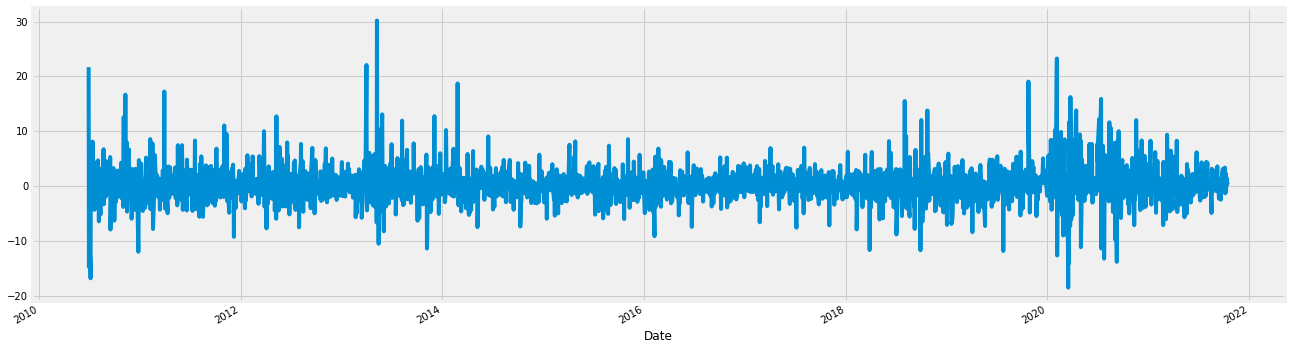

In [10]:
tesla.High.pct_change().mul(100).plot(figsize=(20,6)) # Another way to calculate returns

# Absolute change in successive rows


<AxesSubplot:xlabel='Date'>

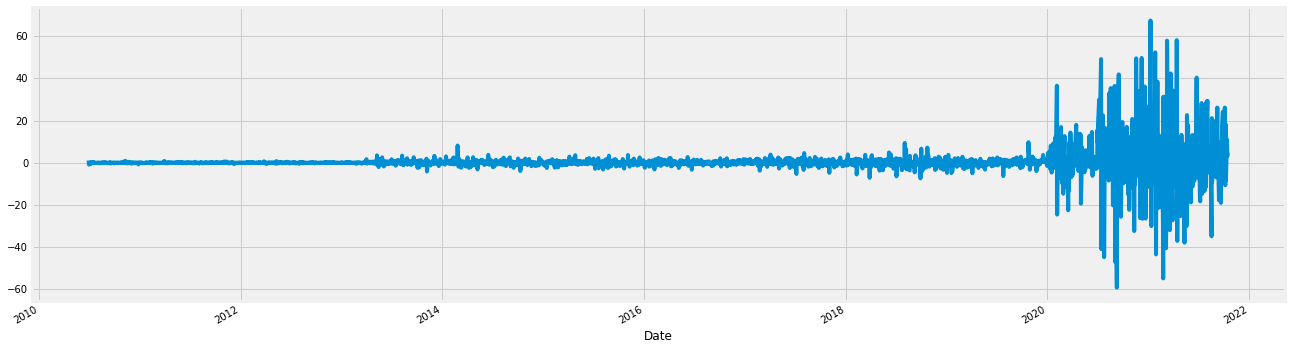

In [11]:
tesla.High.diff().plot(figsize=(20,6))

# OHLC charts

An OHLC chart is any type of price chart that shows the open, high, low and close price of a certain time period. Open-high-low-close Charts (or OHLC Charts) are used as a trading tool to visualise and analyse the price changes over time for securities, currencies, stocks, bonds, commodities, etc. OHLC Charts are useful for interpreting the day-to-day sentiment of the market and forecasting any future price changes through the patterns produced.

**Check this video to know understand the chart** : OHLC Charts Explained


In [12]:
# OHLC chart of October 2021
trace = go.Ohlc(x=tesla['10-2021'].index,
                open=tesla['10-2021'].Open,
                high=tesla['10-2021'].High,
                low=tesla['10-2021'].Low,
                close=tesla['10-2021'].Close)
data = [trace]
iplot(data, filename='simple_ohlc')

In [13]:
# OHLC chart of 2021
trace = go.Ohlc(x=tesla['2021'].index,
                open=tesla['2021'].Open,
                high=tesla['2021'].High,
                low=tesla['2021'].Low,
                close=tesla['2021'].Close)
data = [trace]
iplot(data, filename='simple_ohlc')



In [14]:
# OHLC chart from 2010 to 2021
trace = go.Ohlc(x=tesla.index,
                open=tesla.Open,
                high=tesla.High,
                low=tesla.Low,
                close=tesla.Close)
data = [trace]
iplot(data, filename='simple_ohlc')


# Candlestick charts

*     Candlestick charts are used by traders to determine possible price movement based on past patterns.
*     Candlesticks are useful when trading as they show four price points (open, close, high, and low) throughout the period of time the trader specifies.

**To understand the chart,check this video:** Understanding Candlestick Charts for Beginners


In [15]:
# Candlestick chart of October 2021
trace = go.Candlestick(x=tesla['2021'].index,
                open=tesla['2021'].Open,
                high=tesla['2021'].High,
                low=tesla['2021'].Low,
                close=tesla['2021'].Close)
data = [trace]
iplot(data, filename='simple_candlestick')

In [16]:
# Candlestick chart of 2021
trace = go.Candlestick(x=tesla['2021'].index,
                open=tesla['2021'].Open,
                high=tesla['2021'].High,
                low=tesla['2021'].Low,
                close=tesla['2021'].Close)
data = [trace]
iplot(data, filename='simple_candlestick')

In [17]:
# Candlestick chart of 2010-2021
trace = go.Candlestick(x=tesla.index,
                open=tesla.Open,
                high=tesla.High,
                low=tesla.Low,
                close=tesla.Close)
data = [trace]
iplot(data, filename='simple_candlestick')




# Autocorrelation and Partial Autocorrelation

*     Autocorrelation - The autocorrelation function (ACF) measures how a series is correlated with itself at different lags.

*     Partial Autocorrelation - The partial autocorrelation function can be interpreted as a regression of the series against its past lags. The terms can be interpreted the same way as a standard linear regression, that is the contribution of a change in that particular lag while holding others constant.

**Source: Quora**


# Autocorrelation

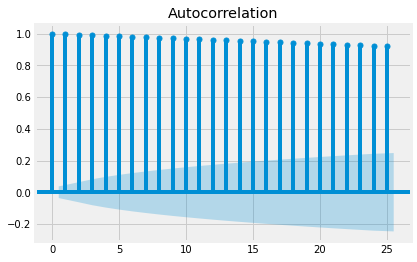

In [18]:
# Autocorrelation of closing price of facebook stocks
plot_acf(tesla["Close"],lags=25)
plt.show()



# Partial Autocorrelation

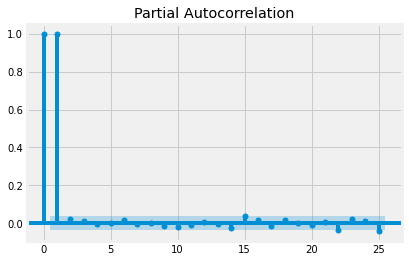

In [19]:
# Partial Autocorrelation of closing price of facebook stocks
plot_pacf(tesla["Close"],lags=25)
plt.show()

**Here, only 0th, 1st,22th, 25th  lag are statistically significant.**



# Time series decomposition and Random walks¶

**Trends, seasonality and noise**

These are the components of a **time series**

*     Trend - Consistent upwards or downwards slope of a time series
*     Seasonality - Clear periodic pattern of a time series(like sine funtion)
*     Noise - Outliers or missing values



<AxesSubplot:xlabel='Date'>

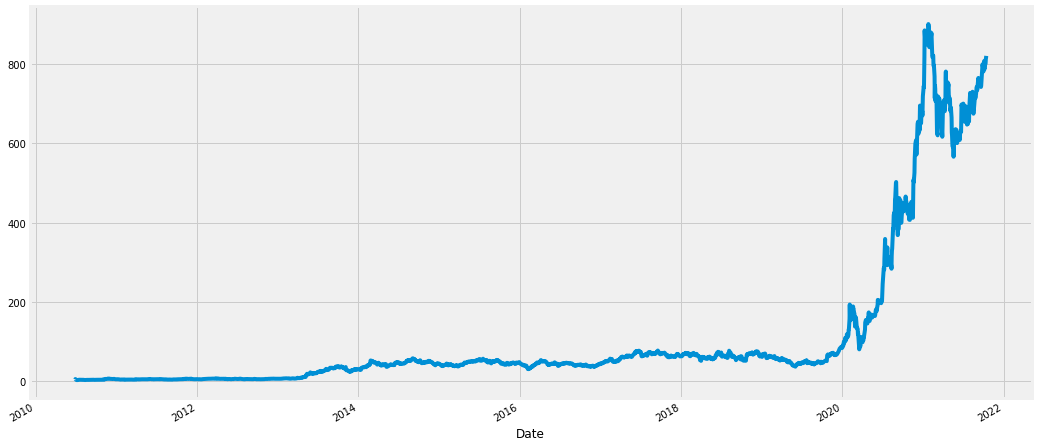

In [20]:
# Let's take facebook stocks High for this
tesla["High"].plot(figsize=(16,8))

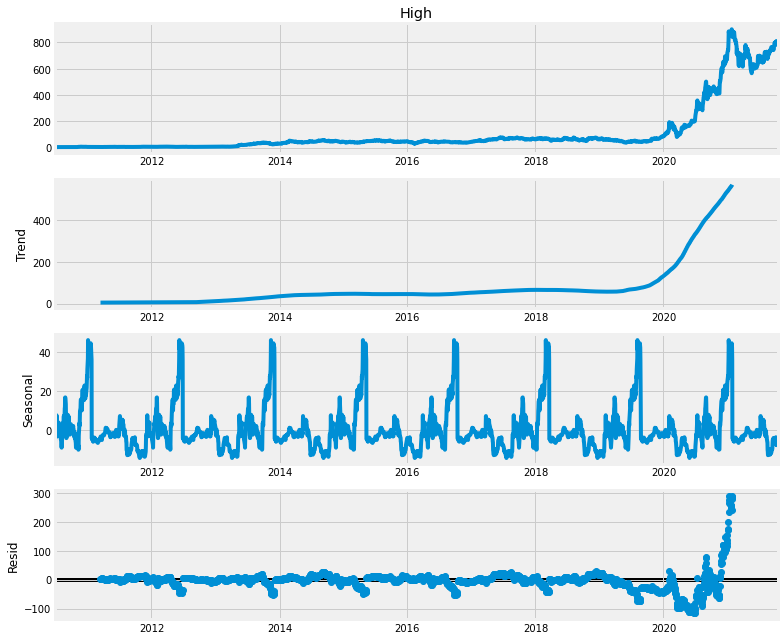

In [21]:
# Now, for decomposition.
rcParams['figure.figsize'] = 11, 9
decomposed_tesla_volume = sm.tsa.seasonal_decompose(tesla["High"],freq=360) # The frequncy is annual
figure = decomposed_tesla_volume.plot()
plt.show()

# **************To be continued************

**Reference:**

*     https://www.kaggle.com/thebrownviking20/everything-you-can-do-with-a-time-series/notebook
*     https://www.investopedia.com/articles/active-trading/092315/5-most-powerful-candlestick-patterns.asp
*     https://www.kaggle.com/taronzakaryan/predicting-stock-price-using-lstm-model-pytorch/notebook
*     https://www.kaggle.com/faressayah/stock-market-analysis-prediction-using-lstm/notebook
*     https://www.kaggle.com/raoulma/ny-stock-price-prediction-rnn-lstm-gru/notebook
*     https://www.kaggle.com/pierpaolo28/stock-market-analysis-and-time-series-prediction/notebook
*     https://www.kaggle.com/parulpandey/getting-started-with-time-series-using-pandas

